2. 2-class MSE Classifier. In this problem you will code the MSE Classifier for binary classification on a synthetic dataset that has two features. You will implement it by using Linear Regression with and without L2 regularization. You will also transform the features to higher dimensional space using polynomials of different order and compare results. In order to turn the class labels into target values for regression, use the following convention. The data points of the first class are assigned target value +1 and data points of the second
class are assigned target value -1. After the regression model is trained, you may use simple decision rule to assign class labels – if predicted output is positive, it is assigned to the first class, else if the predicted output is negative, it is assigned to the second class. Do not use reflected data points nor perform any standardization or any data preprocessing (other than generating polynomial features). Do not use augmented feature space as the
polynomial generator function will do it for you. In order to generate the polynomial features you may use the PolynomialFeatures class from sklearn.preprocessing. Set the degree parameter to the desired degree of polynomial (p).
Make sure that the include_bias parameter is to True (which is the default value). This ensures the transformed features are in the augmented space. Create an object of PolynomialFeatures and call the fit_transform() function to generate polynomial features of the specified degree. As a sanity check, make sure for degree=2, you get 6 features. They are [1, 𝑥$, 𝑥%, 𝑥$%, 𝑥$𝑥%, 𝑥%%].

In [64]:
# Importing the necessary libraries:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

(a) Code a MSE classifier with 7 different degrees of polynomial (𝑝 = 1,2,3,4,5,6,7). As a baseline, do not use any regularization. Use the LinearRegression or Ridge class from sklearn.linear_model for this problem. It is important to set the fit_intercept parameter to False (default value is True). This is
because your features are already in the augmented space and will have an additional weight component (𝑤&) associated. If you use Ridge regression class, make sure you set alpha=0. This will default to Linear Regression without regularization. You will need the fit() method to train the regressor and predict() to obtain prediction. Explore other parameters/methods of these classes for your understanding. No need to report anything.
i. Report the classification accuracy on the training and test sets for each value of p.
ii. Plot the training data points and the decision regions for 𝑝 = 1,2,4,7. Observe the same plots for other values of p (no need to include in your submission). Make sure that the plot is in the original two-dimensional feature space. The decision boundary would be linear in the transformed space and would appear to be non-linear on the 2D plot. The PlotNonlinear.py function would be useful here.
iii. Plot the train and test accuracy vs. p on a single plot for all values of p.
iv. Plot 𝐽'() vs. p for all values of p.
Note: In order to calculate 𝐽'() make sure you use the target values (-1/1) set for regression and not the original class labels. 𝐽'() is calculated based on the training data.

In [65]:
polynomials = [1, 2, 3, 4, 5, 6, 7]
criterion_func = [] 
test_criterion_func = [] 
accuracy = [] 
test_accuracy = []

for i in polynomials:
    print('\n Degree-', i, '\n')
    data = np.genfromtxt('hw5_train.csv', delimiter = ',')
    X = np.asarray(data[:, :2]) # Extracting X data from the dataset.  
    y = np.asarray(data[:, 2]) # Extracting labels from the dataset.
    y_new = np.zeros([len(y), ]) # Creating prediction labels.
    
    for ele in range(len(y)):
        # Defining the classification condition:
        if y[ele] == 0:
            y_new[ele] = -1
        else:
            y_new[ele] = 1

    poly_transform = PolynomialFeatures(i) # Polynomial transformation.
    X_new = poly_transform.fit_transform(X) # Transforming the variable.
    linear_regression = LinearRegression(fit_intercept = False)
    linear_regression.fit(X_new, y_new)
    lr_labels_prediction = np.where(linear_regression.predict(X_new) > 0, 1, -1)
    accuracy.append(np.sum(lr_labels_prediction == y_new) / len(y) * 100)
    print("The accuracy during the training accuracy phase= ", np.sum(lr_labels_prediction == y_new) / len(y) * 100, "%")
    criterion_func_mse = mean_squared_error(y_new, lr_labels_prediction)
    print("J values during the training phase: ", criterion_func_mse)
    criterion_func.append(criterion_func_mse)

    data_test = np.genfromtxt('hw5_test.csv', delimiter = ',')
    X_test = np.asarray(data_test[:, :2])
    y_test = np.asarray(data_test[:, 2])
    poly_transform_test = PolynomialFeatures(i)
    X_new_test = poly_transform_test.fit_transform(X_test)
    y_new_test = np.zeros([len(y_test), ])
    
    for ele in range(len(y_test)):
        
        if y_test[ele] == 0:
            y_new_test[ele] = -1
        else:
            y_new_test[ele] = 1

    lr_labels_prediction_test = np.where(linear_regression.predict(X_new_test) > 0, 1, -1)
    test_accuracy.append(np.sum(lr_labels_prediction_test == y_new_test) / len(y_test) * 100)
    print("The accuracy during testing phase= ", np.sum(lr_labels_prediction_test == y_new_test) / len(y_test) * 100, "%")
    test_criterion_func_mse = mean_squared_error(y_new_test, lr_labels_prediction_test)
    print("J values during the testing phase: ", test_criterion_func_mse)
    test_criterion_func.append(test_criterion_func_mse)


 Degree- 1 

The accuracy during the training accuracy phase=  80.0 %
J values during the training phase:  0.8
The accuracy during testing phase=  77.0 %
J values during the testing phase:  0.92

 Degree- 2 

The accuracy during the training accuracy phase=  88.33333333333333 %
J values during the training phase:  0.4666666666666667
The accuracy during testing phase=  84.5 %
J values during the testing phase:  0.62

 Degree- 3 

The accuracy during the training accuracy phase=  88.33333333333333 %
J values during the training phase:  0.4666666666666667
The accuracy during testing phase=  83.5 %
J values during the testing phase:  0.66

 Degree- 4 

The accuracy during the training accuracy phase=  90.0 %
J values during the training phase:  0.4
The accuracy during testing phase=  81.5 %
J values during the testing phase:  0.74

 Degree- 5 

The accuracy during the training accuracy phase=  90.0 %
J values during the training phase:  0.4
The accuracy during testing phase=  80.0 %
J val

i. Report the classification accuracy on the training and test sets for each value of p.

In [76]:
## this function is from Prof. Chugg's PlotNonLinear.py script
## https://github.com/keithchugg/ee559_spring2023/blob/main/hw_helpers/PlotNonlinear.py
def plotDecBoundaries_linear(feature, labels, d, fsize = (6, 4), legend_on = False):
    
    '''
    Plot the decision boundaries and data points for any binary classifiers
    
    feature: origianl2D feautre, N x 2 array:
        N: number of data points
        2: number of features 
    labels: class lables correspond to feature, N x 1 array: [0,0,1,1,0,0,...]
        N: number of data points
    legend_on: add the legend in the plot. potentially slower for datasets with large number of clases and data points
    ----------------------------
    You need to write the following two functions

    non_linear_trans: your custom non-linear transforation function.
        <feature_nonlinear> = non_linear_trans(<feature_original>), 
            Input: <feature_original>, Nx2 array, 
            Output: <feature_nonlinear>: Nx? array.
        if no nonlinear transformation performs, then, 
        let non_linear_trans = lambda x:x, which just output your original feature
    
    predictor: your custom predictor.
        <predictions> = predictor(<feature>)
            Input: <feature> Nx? array.
            Output: <predictions> binary labels, i.e., array ([0,1,0,0,1...])

    If you don't want write custom functions, you can modify this plot function based on your need,
    do non-linear transformation and class prediction inside this plot function.
    ----------------------------
    '''

    labels = labels.astype(int)

    # Set the feature range for ploting
    max_x = np.ceil(max(feature[:, 0])) + 1
    min_x = np.floor(min(feature[:, 0])) - 1
    max_y = np.ceil(max(feature[:, 1])) + 1
    min_y = np.floor(min(feature[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.05

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1] + inc / 100, inc), np.arange(yrange[0], yrange[1] + inc / 100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0] * x.shape[1], 1, order = 'F'), y.reshape(y.shape[0] * y.shape[1], 1, order = 'F')) ) # make (x,y) pairs as a bunch of row vectors.
    
    '''
    You should write the custom functions, non_linear_trans and predictor
    '''
    # apply non-linear transformation to all points in the map (not only data points)
    poly_transform = PolynomialFeatures(d)
    xy = poly_transform.fit_transform(xy)
    xy = xy
    
    # predict the class of all points in the map 
    poly_transform = PolynomialFeatures(d)
    features = poly_transform.fit_transform(feature)
    linear_regression = LinearRegression(fit_intercept = False)
    linear_regression.fit(features, labels)
    
    pred_label = np.where(linear_regression.predict(xy) > 0, 1, 0)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order = 'F')

    # documemtation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    symbols_ar = np.array(['rx', 'bo', 'ms', 'cd','gp','y*','kx','gP','r+','bh'])
    #show the image, give each coordinate a color according to its class label
    plt.figure(figsize = fsize)

    plt.imshow(decisionmap, extent = [xrange[0], xrange[1], yrange[0], yrange[1]], origin = 'lower', aspect = 'auto')

    # plot the class data.
    plot_index = 0
    class_list = []
    class_list_name = [] #for legend
    for cur_label in np.unique(labels):
        # print(cur_label,plot_index,np.sum(label_train == cur_label))
        d1, = plt.plot(feature[labels == cur_label, 0],feature[labels == cur_label, 1], symbols_ar[plot_index])

        if legend_on:
            class_list.append(d1)
            class_list_name.append('Class ' + str(plot_index))
            l = plt.legend(class_list,class_list_name, loc = 2)
            plt.gca().add_artist(l)
       
        plot_index = plot_index + 1
    
    plt.title("Degree %d" % d)
    plt.show()
    
## this function is from Prof. Chugg's PlotNonLinear.py script
## https://github.com/keithchugg/ee559_spring2023/blob/main/hw_helpers/PlotNonlinear.py
def plotDecBoundaries_ridge(feature, labels, d, lamb, fsize = (6, 4), legend_on = False):
    
    '''
    Plot the decision boundaries and data points for any binary classifiers
    
    feature: origianl2D feautre, N x 2 array:
        N: number of data points
        2: number of features 
    labels: class lables correspond to feature, N x 1 array: [0,0,1,1,0,0,...]
        N: number of data points
    legend_on: add the legend in the plot. potentially slower for datasets with large number of clases and data points
    ----------------------------
    You need to write the following two functions

    non_linear_trans: your custom non-linear transforation function.
        <feature_nonlinear> = non_linear_trans(<feature_original>), 
            Input: <feature_original>, Nx2 array, 
            Output: <feature_nonlinear>: Nx? array.
        if no nonlinear transformation performs, then, 
        let non_linear_trans = lambda x:x, which just output your original feature
    
    predictor: your custom predictor.
        <predictions> = predictor(<feature>)
            Input: <feature> Nx? array.
            Output: <predictions> binary labels, i.e., array ([0,1,0,0,1...])

    If you don't want write custom functions, you can modify this plot function based on your need,
    do non-linear transformation and class prediction inside this plot function.
    ----------------------------
    '''

    labels = labels.astype(int)

    # Set the feature range for ploting
    max_x = np.ceil(max(feature[:, 0])) + 1
    min_x = np.floor(min(feature[:, 0])) - 1
    max_y = np.ceil(max(feature[:, 1])) + 1
    min_y = np.floor(min(feature[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.05

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1] + inc / 100, inc), np.arange(yrange[0], yrange[1] + inc / 100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0] * x.shape[1], 1, order = 'F'), y.reshape(y.shape[0] * y.shape[1], 1, order = 'F')) ) # make (x,y) pairs as a bunch of row vectors.
    
    '''
    You should write the custom functions, non_linear_trans and predictor
    '''
    # apply non-linear transformation to all points in the map (not only data points)
    poly_transform = PolynomialFeatures(d)
    xy = poly_transform.fit_transform(xy)
    xy = xy
    
    # predict the class of all points in the map 
    poly_transform = PolynomialFeatures(d)
    features = poly_transform.fit_transform(feature)
    ridge_regression = Ridge(lamb)
    ridge_regression.fit(features, labels)
    
    pred_label = np.where(ridge_regression.predict(xy) > 0, 1, 0)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order = 'F')

    # documemtation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    symbols_ar = np.array(['rx', 'bo', 'ms', 'cd','gp','y*','kx','gP','r+','bh'])
    #show the image, give each coordinate a color according to its class label
    plt.figure(figsize = fsize)

    plt.imshow(decisionmap, extent = [xrange[0], xrange[1], yrange[0], yrange[1]], origin = 'lower', aspect = 'auto')

    # plot the class data.
    plot_index = 0
    class_list = []
    class_list_name = [] #for legend
    for cur_label in np.unique(labels):
        # print(cur_label,plot_index,np.sum(label_train == cur_label))
        d1, = plt.plot(feature[labels == cur_label, 0],feature[labels == cur_label, 1], symbols_ar[plot_index])

        if legend_on:
            class_list.append(d1)
            class_list_name.append('Class ' + str(plot_index))
            lamb = plt.legend(class_list,class_list_name, loc = 2)
            plt.gca().add_artist(lamb)
       
        plot_index = plot_index + 1

    plt.title("Lambda %d, " % lamb + "Degree %d" % d)
    plt.show()

ii. Plot the training data points and the decision regions for 𝑝 = 1,2,4,7. Observe the same plots for other values of p (no need to include in your submission). Make sure that the plot is in the original two-dimensional feature space. The decision boundary would be linear in the transformed space and would appear to be non-linear on the 2D plot. The PlotNonlinear.py function would be useful here.

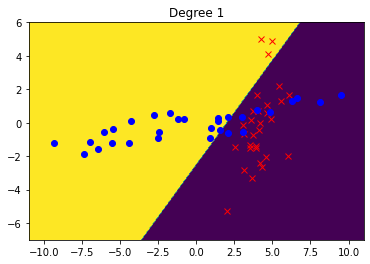

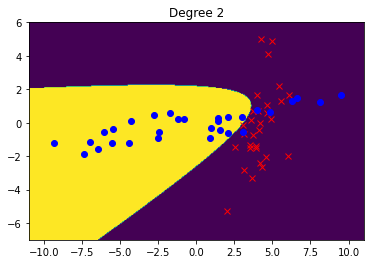

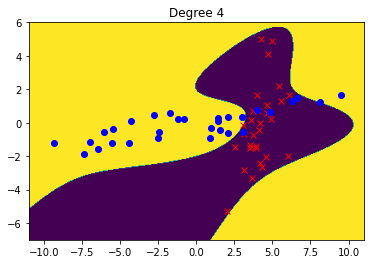

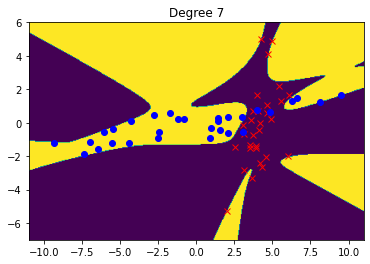

In [67]:
degrees = [1, 2, 4, 7]

for i in degrees:
    plotDecBoundaries_linear(X, y_new, i)

iii. Plot the train and test accuracy vs. p on a single plot for all values of p.

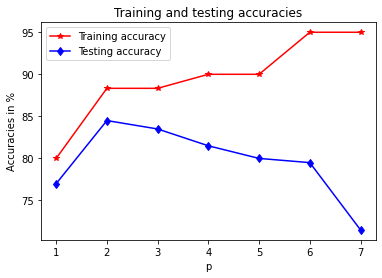

In [68]:
plt.title("Training and testing accuracies")
plt.xlabel("p")
plt.ylabel("Accuracies in %")
plt.plot(polynomials, accuracy, label = 'Training accuracy', marker = '*', color = 'red')
plt.plot(polynomials, test_accuracy, label = 'Testing accuracy', marker = 'd', color = 'blue')
plt.legend()
plt.show()

iv. Plot 𝐽'() vs. p for all values of p.
Note: In order to calculate 𝐽'() make sure you use the target values (-1/1) set for regression and not the original class labels. 𝐽'() is calculated based on the training data.

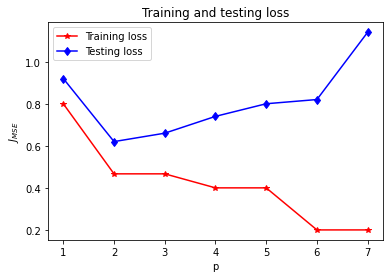

In [69]:
plt.title("Training and testing loss")
plt.xlabel("p")
plt.ylabel("$J_{MSE}$")
plt.plot(polynomials, criterion_func, label = 'Training loss', marker = '*', color = 'red')
plt.plot(polynomials, test_criterion_func, label='Testing loss', marker = 'd', color = 'blue')
plt.legend()
plt.show()

(d) Repeat part (a) but with regularization. Use six different values of 𝜆, 𝜆 = 0.3, 1, 3, 10, 30, 100. The sklearn Ridge class uses parameter alpha instead, however it is the same as 𝜆. Note that you can no longer use the LinearRegression class for this part. For the plots in (a)ii. of the decision regions, report only the plots for 𝑝 = 1,2,4,7 for this sub problem, each with 𝜆 = 1,10,100 (12 plots in all). However, observe all plots for your understanding. Repeat everything for (a)i., (a)iii., (a)iv. as it is (for all seven values of p and six values of 𝜆).


 Lambda value- 0.3

Degree- 1 

The accuracy during the training phase=  80.0 %
J values during the training phase:  0.8
The accuracy during the testing phase=  77.0 %
J values during the testing phase:  0.92

Degree- 2 

The accuracy during the training phase=  88.33333333333333 %
J values during the training phase:  0.4666666666666667
The accuracy during the testing phase=  84.5 %
J values during the testing phase:  0.62

Degree- 3 

The accuracy during the training phase=  88.33333333333333 %
J values during the training phase:  0.4666666666666667
The accuracy during the testing phase=  83.5 %
J values during the testing phase:  0.66

Degree- 4 

The accuracy during the training phase=  90.0 %
J values during the training phase:  0.4
The accuracy during the testing phase=  82.0 %
J values during the testing phase:  0.72

Degree- 5 

The accuracy during the training phase=  90.0 %
J values during the training phase:  0.4
The accuracy during the testing phase=  81.0 %
J values during

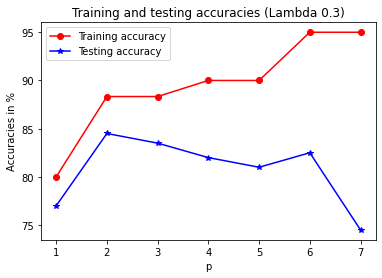

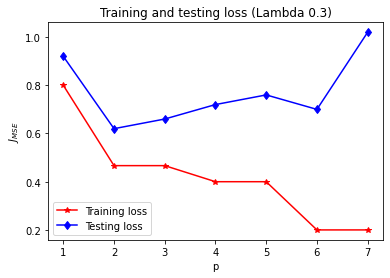


 Lambda value- 1

Degree- 1 

The accuracy during the training phase=  80.0 %
J values during the training phase:  0.8
The accuracy during the testing phase=  77.0 %
J values during the testing phase:  0.92

Degree- 2 

The accuracy during the training phase=  88.33333333333333 %
J values during the training phase:  0.4666666666666667
The accuracy during the testing phase=  84.5 %
J values during the testing phase:  0.62

Degree- 3 

The accuracy during the training phase=  88.33333333333333 %
J values during the training phase:  0.4666666666666667
The accuracy during the testing phase=  83.5 %
J values during the testing phase:  0.66

Degree- 4 

The accuracy during the training phase=  91.66666666666666 %
J values during the training phase:  0.3333333333333333
The accuracy during the testing phase=  83.0 %
J values during the testing phase:  0.68

Degree- 5 

The accuracy during the training phase=  90.0 %
J values during the training phase:  0.4
The accuracy during the testing phas

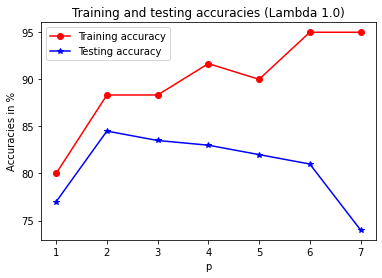

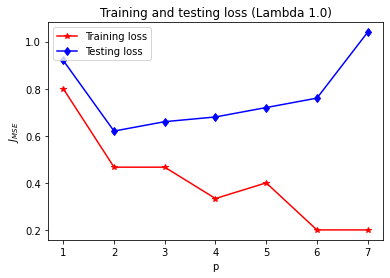


 Lambda value- 3

Degree- 1 

The accuracy during the training phase=  80.0 %
J values during the training phase:  0.8
The accuracy during the testing phase=  77.5 %
J values during the testing phase:  0.9

Degree- 2 

The accuracy during the training phase=  88.33333333333333 %
J values during the training phase:  0.4666666666666667
The accuracy during the testing phase=  84.5 %
J values during the testing phase:  0.62

Degree- 3 

The accuracy during the training phase=  88.33333333333333 %
J values during the training phase:  0.4666666666666667
The accuracy during the testing phase=  84.0 %
J values during the testing phase:  0.64

Degree- 4 

The accuracy during the training phase=  91.66666666666666 %
J values during the training phase:  0.3333333333333333
The accuracy during the testing phase=  84.0 %
J values during the testing phase:  0.64

Degree- 5 

The accuracy during the training phase=  90.0 %
J values during the training phase:  0.4
The accuracy during the testing phase

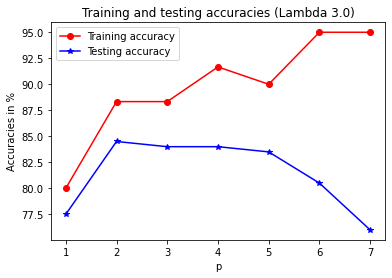

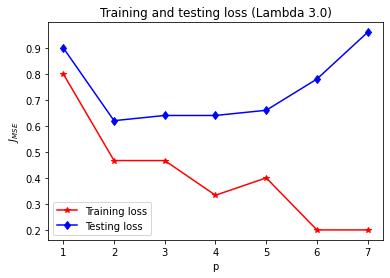


 Lambda value- 10

Degree- 1 

The accuracy during the training phase=  80.0 %
J values during the training phase:  0.8
The accuracy during the testing phase=  78.0 %
J values during the testing phase:  0.88

Degree- 2 

The accuracy during the training phase=  88.33333333333333 %
J values during the training phase:  0.4666666666666667
The accuracy during the testing phase=  84.5 %
J values during the testing phase:  0.62

Degree- 3 

The accuracy during the training phase=  88.33333333333333 %
J values during the training phase:  0.4666666666666667
The accuracy during the testing phase=  84.0 %
J values during the testing phase:  0.64

Degree- 4 

The accuracy during the training phase=  91.66666666666666 %
J values during the training phase:  0.3333333333333333
The accuracy during the testing phase=  84.5 %
J values during the testing phase:  0.62

Degree- 5 

The accuracy during the training phase=  91.66666666666666 %
J values during the training phase:  0.3333333333333333
The acc

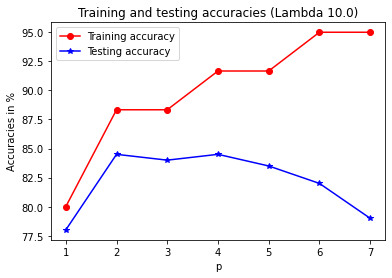

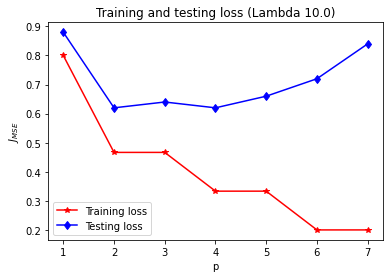


 Lambda value- 30

Degree- 1 

The accuracy during the training phase=  80.0 %
J values during the training phase:  0.8
The accuracy during the testing phase=  78.0 %
J values during the testing phase:  0.88

Degree- 2 

The accuracy during the training phase=  88.33333333333333 %
J values during the training phase:  0.4666666666666667
The accuracy during the testing phase=  85.0 %
J values during the testing phase:  0.6

Degree- 3 

The accuracy during the training phase=  88.33333333333333 %
J values during the training phase:  0.4666666666666667
The accuracy during the testing phase=  84.0 %
J values during the testing phase:  0.64

Degree- 4 

The accuracy during the training phase=  91.66666666666666 %
J values during the training phase:  0.3333333333333333
The accuracy during the testing phase=  85.5 %
J values during the testing phase:  0.58

Degree- 5 

The accuracy during the training phase=  91.66666666666666 %
J values during the training phase:  0.3333333333333333
The accu

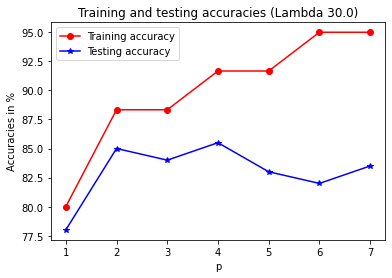

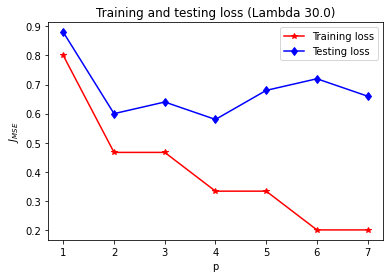


 Lambda value- 100

Degree- 1 

The accuracy during the training phase=  83.33333333333334 %
J values during the training phase:  0.6666666666666666
The accuracy during the testing phase=  81.5 %
J values during the testing phase:  0.74

Degree- 2 

The accuracy during the training phase=  88.33333333333333 %
J values during the training phase:  0.4666666666666667
The accuracy during the testing phase=  85.0 %
J values during the testing phase:  0.6

Degree- 3 

The accuracy during the training phase=  91.66666666666666 %
J values during the training phase:  0.3333333333333333
The accuracy during the testing phase=  86.0 %
J values during the testing phase:  0.56

Degree- 4 

The accuracy during the training phase=  90.0 %
J values during the training phase:  0.4
The accuracy during the testing phase=  85.5 %
J values during the testing phase:  0.58

Degree- 5 

The accuracy during the training phase=  88.33333333333333 %
J values during the training phase:  0.4666666666666667
The acc

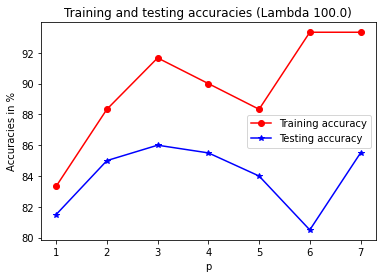

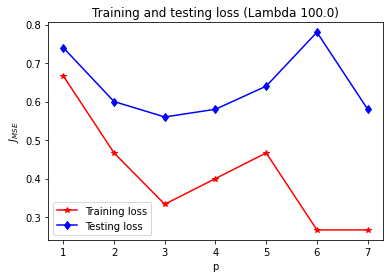

In [70]:
lmbd = [0.3, 1, 3, 10, 30, 100]
p = [1, 2, 3, 4, 5, 6, 7]
# One hot encoding of p values:
degree = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
degree_test = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
criterion_func = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
test_criterion_func = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}

for i in lmbd:
    criterion_func_list = [] 
    test_criterion_func_list = []
    accuracy = []
    test_accuracy = []
    print('\n Lambda value-', i)
    
    for element in p:
        print('\nDegree-', element, '\n')
        data = np.genfromtxt('hw5_train.csv', delimiter = ',')
        X = np.asarray(data[:, :2]) 
        y = np.asarray(data[:, 2]) 
        y_new = np.zeros([len(y), ])
        
        for iter in range(len(y)):
            
            if y[iter] == 0:
                y_new[iter] = -1
            else:
                y_new[iter] = 1

        poly_transform = PolynomialFeatures(element)
        X_new = poly_transform.fit_transform(X)
        ridge_regression = Ridge(alpha = i)
        ridge_regression.fit(X_new, y_new)
        lr_labels_prediction = np.where(ridge_regression.predict(X_new) > 0, 1, -1)
        print("The accuracy during the training phase= ", np.sum(lr_labels_prediction == y_new) / len(y) * 100, "%")
        degree[element].append(np.sum(lr_labels_prediction == y_new) / len(y) * 100)
        accuracy.append(np.sum(lr_labels_prediction == y_new) / len(y) * 100)
        criterion_func_mse = mean_squared_error(y_new, lr_labels_prediction)
        print("J values during the training phase: ", criterion_func_mse)
        criterion_func[element].append(criterion_func_mse)
        criterion_func_list.append(criterion_func_mse)
        
        data = np.genfromtxt('hw5_test.csv', delimiter=',')
        X_test = np.asarray(data[:, :2])
        y_test = np.asarray(data[:, 2])
        poly_transform = PolynomialFeatures(element)
        X_new_test = poly_transform.fit_transform(X_test)
        y_new_test = np.zeros([len(y_test), ])
        
        for j in range(len(y_test)):
            
            if y_test[j] == 0:
                y_new_test[j] = -1
            else:
                y_new_test[j] = 1

        lr_labels_prediction_test = np.where(ridge_regression.predict(X_new_test) > 0, 1, -1)
        print("The accuracy during the testing phase= ", np.sum(lr_labels_prediction_test == y_new_test)/len(y_test)*100, "%")
        degree_test[element].append(np.sum(lr_labels_prediction_test == y_new_test)/len(y_test)*100)
        test_accuracy.append(np.sum(lr_labels_prediction_test == y_new_test)/len(y_test)*100)
        test_criterion_func_mse = (mean_squared_error(y_new_test, lr_labels_prediction_test))
        print("J values during the testing phase: ", test_criterion_func_mse)
        test_criterion_func[element].append(test_criterion_func_mse)
        test_criterion_func_list.append(test_criterion_func_mse)
        
    plt.title("Training and testing accuracies (Lambda %.1f)" % i)
    plt.plot(p, accuracy, label = 'Training accuracy', marker = 'o', color = 'red')
    plt.plot(p, test_accuracy, label = 'Testing accuracy', marker = '*', color = 'blue')
    plt.xlabel("p")
    plt.ylabel("Accuracies in %")
    plt.legend()
    plt.show()
    
    plt.title("Training and testing loss (Lambda %.1f)" % i)
    plt.plot(p, criterion_func_list, label = 'Training loss', marker = '*', color = 'red')
    plt.plot(p, test_criterion_func_list, label = 'Testing loss', marker = 'd', color = 'blue')
    plt.xlabel("p")
    plt.ylabel("$J_{MSE}$")
    plt.legend()
    plt.show()

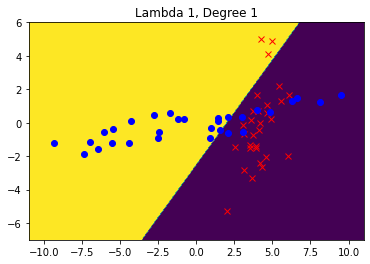

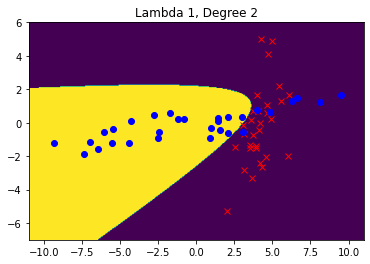

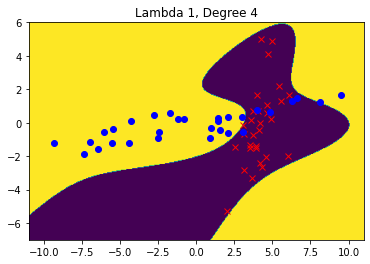

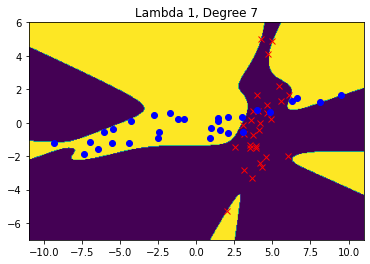

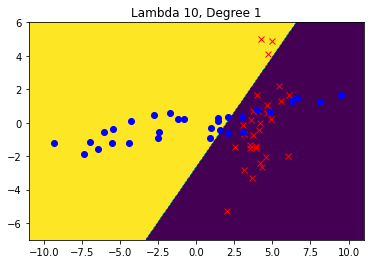

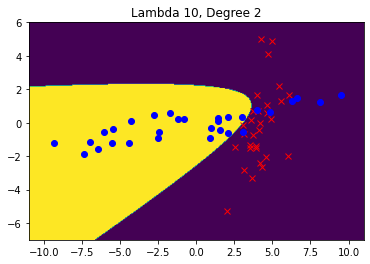

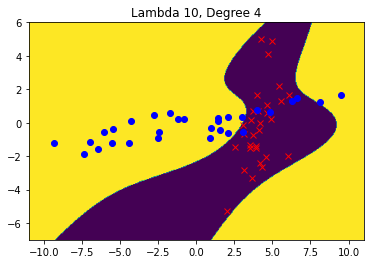

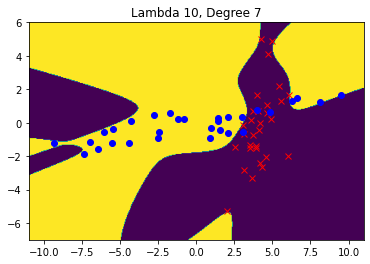

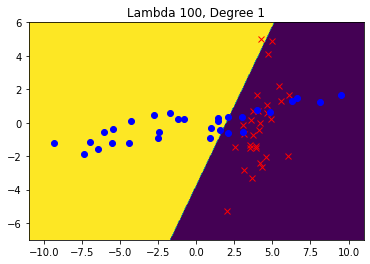

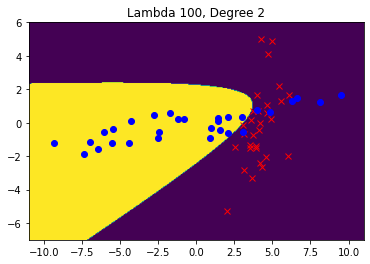

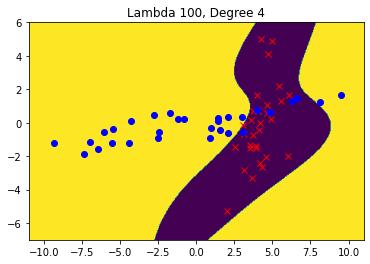

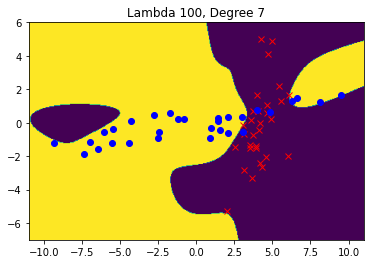

In [77]:
lam = [1, 10, 100]
d = [1, 2, 4, 7]

for i in lam:
    
    for iterable in d:
        plotDecBoundaries_ridge(X, y_new, iterable, i)

(e) Additionally, plot test accuracy vs. log (𝜆), for 𝑝 = 1,2,4,7 on a single plot. Use log base 10. (Also consider 𝜆 = 0 case, which will be your results from part (a).)

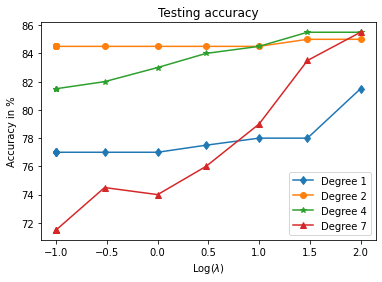

In [81]:
lmbd.insert(0, 0.1)
log = [77.0, 84.5, 83.5, 81.5, 80.0, 79.5, 71.5]

for i in range(1, 8):
    degree_test[i].insert(0, log[i - 1])
    
plt.title("Testing accuracy")
plt.xlabel("Log($\lambda$)")
plt.ylabel("Accuracy in %")
plt.plot(np.log10(lmbd), degree_test[1], label = 'Degree 1', marker = 'd')
plt.plot(np.log10(lmbd), degree_test[2], label = 'Degree 2', marker = 'o')
plt.plot(np.log10(lmbd), degree_test[4], label = 'Degree 4', marker = '*')
plt.plot(np.log10(lmbd), degree_test[7], label = 'Degree 7', marker = '^')
plt.legend()
plt.show()